## Loan Approval System

## @authors: Shouvit & Debaleen

##### Importing modules

In [1]:
import numpy as np # for numpy functions and ndarray
import pandas as pd # for handling data
import matplotlib.pyplot as plt # for plotting graphs i.e. data visualisation
import seaborn as sns # for plotting graphs i.e. data visualisation

##### Loading data and getting data descriptions

In [2]:
# loading training dataset
Data = pd.read_csv("train.csv")

# making a copy of the main Data to manipulate
X = Data.copy()

# dataset description
X.describe(include="all")

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,100.000000,99,100,100,100,94,100.00000,100.000000,95.000000,95.000000,92.000000,100,100
unique,NaN,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,M,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,NaN,84,69,60,77,81,NaN,NaN,NaN,NaN,NaN,50,64
mean,1160.470000,NaN,NaN,NaN,NaN,NaN,4122.83000,1700.550000,134.221053,341.684211,0.836957,NaN,NaN
std,104.622212,NaN,NaN,NaN,NaN,NaN,2258.89434,1947.668891,63.456163,61.309342,0.371429,NaN,NaN
min,1002.000000,NaN,NaN,NaN,NaN,NaN,1000.00000,0.000000,17.000000,60.000000,0.000000,NaN,NaN
25%,1062.500000,NaN,NaN,NaN,NaN,NaN,2636.00000,0.000000,99.500000,360.000000,1.000000,NaN,NaN
50%,1153.000000,NaN,NaN,NaN,NaN,NaN,3598.00000,1558.500000,120.000000,360.000000,1.000000,NaN,NaN
75%,1253.500000,NaN,NaN,NaN,NaN,NaN,4710.00000,2394.500000,154.500000,360.000000,1.000000,NaN,NaN


#### Pre-Processing Data

##### Changing non-numeric values to numeric values

In [3]:
X.Married.replace(['No', 'Yes'], [0, 1], inplace=True) # replacing 'No' with 0 and 'Yes' with 1 in 'Married' 
                                                       # column
    
X.Gender.replace(['M', 'F'], [0, 1], inplace = True) # replacing 'M' with 0 and 'F' with 1 in 'Gender' column

X.Dependents.replace(['0', '1', '2', '3+'], [0, 1, 2, 3], inplace=True) # replacing '0' with 0, '1' with 1, '2' 
                                                                        # with 2 and '3+' with 3 in
                                                                        # 'Dependents' column
        
X.Education.replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True) # replacing 'Not Graduate' with 0 
                                                                        # and 'Graduate' with 1 in 'Education'
                                                                        # column
        
X.Self_Employed.replace(['No', 'Yes'], [0, 1], inplace=True) # replacing 'No' with 0 and 'Yes' with 1 in 
                                                             # 'Self_Employed' column

X.Property_Area.replace(['Rural','Semiurban', 'Urban'], [0, 1, 2], inplace=True) # replacing 'Rural' with 0, 
                                                                                 # 'Semiurban' with 1 and 
                                                                                 # 'Urban' with 2 in 
                                                                                 # 'Property_Area' column

X.Loan_Status.replace(['N', 'Y'], [0, 1], inplace = True) # replacing 'N' with 0 and 'Y' with 1 in 
                                                          # 'Loan_Status' column

print(X.describe(include="all"))
print(X.dtypes)

       Application_ID     Gender     Married  Dependents   Education  \
count      100.000000  99.000000  100.000000  100.000000  100.000000   
mean      1160.470000   0.151515    0.690000    0.730000    0.770000   
std        104.622212   0.360375    0.464823    1.013594    0.422953   
min       1002.000000   0.000000    0.000000    0.000000    0.000000   
25%       1062.500000   0.000000    0.000000    0.000000    1.000000   
50%       1153.000000   0.000000    1.000000    0.000000    1.000000   
75%       1253.500000   0.000000    1.000000    1.250000    1.000000   
max       1343.000000   1.000000    1.000000    3.000000    1.000000   

       Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count      94.000000        100.00000         100.000000   95.000000   
mean        0.138298       4122.83000        1700.550000  134.221053   
std         0.347063       2258.89434        1947.668891   63.456163   
min         0.000000       1000.00000           0.000000   17.0

##### Searching for Null values

In [4]:
print("Null values count:\n", X.isnull().sum())  # sum of Null values in a column

Null values count:
 Application_ID       0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64


##### Visualising Null values using heatmap

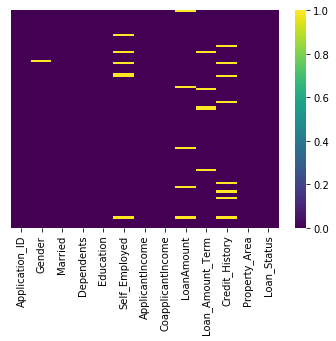

In [5]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='viridis')

##### Handling Null values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1160.470000,0.15000,0.690000,0.730000,0.770000,0.130000,4122.83000,1700.550000,135.480000,341.830000,0.770000,1.410000,0.640000
std,104.622212,0.35887,0.464823,1.013594,0.422953,0.337998,2258.89434,1947.668891,62.427409,60.023237,0.422953,0.652811,0.482418
min,1002.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1000.00000,0.000000,17.000000,60.000000,0.000000,0.000000,0.000000
25%,1062.500000,0.00000,0.000000,0.000000,1.000000,0.000000,2636.00000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000
50%,1153.000000,0.00000,1.000000,0.000000,1.000000,0.000000,3598.00000,1558.500000,122.000000,360.000000,1.000000,1.500000,1.000000
75%,1253.500000,0.00000,1.000000,1.250000,1.000000,0.000000,4710.00000,2394.500000,159.750000,360.000000,1.000000,2.000000,1.000000
max,1343.000000,1.00000,1.000000,3.000000,1.000000,1.000000,12841.00000,10968.000000,349.000000,480.000000,1.000000,2.000000,1.000000


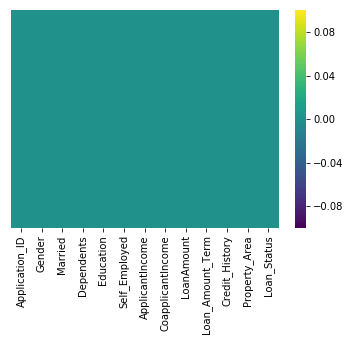

In [6]:
# filling Null values in 'Credit_History' with 0 (as stated in the dataset description from source)
X.Credit_History.fillna(0, inplace=True)

#filling Null values in binary columns with mode value
X.Self_Employed.fillna(X.Self_Employed.mode()[0], inplace=True)
X.Gender.fillna(X.Gender.mode()[0], inplace=True)

# filling Null values with mean +- std in non-binary columns
avg = X.LoanAmount.mean()
std = X.LoanAmount.std()
count = X.LoanAmount.isnull().sum()
random = np.random.randint(avg-std,avg+std,size=count)
X['LoanAmount'][np.isnan(X['LoanAmount'])]=random

avg = X.Loan_Amount_Term.mean()
std = X.Loan_Amount_Term.std()
count = X.Loan_Amount_Term.isnull().sum()
random = np.random.randint(avg-std,avg+std,size=count)
X['Loan_Amount_Term'][np.isnan(X['Loan_Amount_Term'])]=random


sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='viridis')
X.describe(include="all")

In [7]:
# creating a copy of the data after removing Null values
old = X.copy()

##### Checking correlation of every attribute with our target attribute i.e. 'Loan_Status'

In [8]:
f = X.columns[1:-1] # selecting all columns except 'Application_ID' since that is not a determining factor
print("\n\nCorrelation of each attribute with Loan Status: \n")
for i in f:
    corr = X[i].corr(X['Loan_Status'])
    print(i, ":", corr)



Correlation of each attribute with Loan Status: 

Gender : -0.09335200560186736
Married : 0.12792979689405484
Dependents : 0.0057840889995565475
Education : -0.013861413315217981
Self_Employed : 0.04212465653604544
ApplicantIncome : -0.1196673096146476
CoapplicantIncome : -0.03110315854904195
LoanAmount : -0.14446441796336063
Loan_Amount_Term : -0.09806487882763729
Credit_History : 0.5306941097826289
Property_Area : 0.24889474150088223


##### Checking for outliers

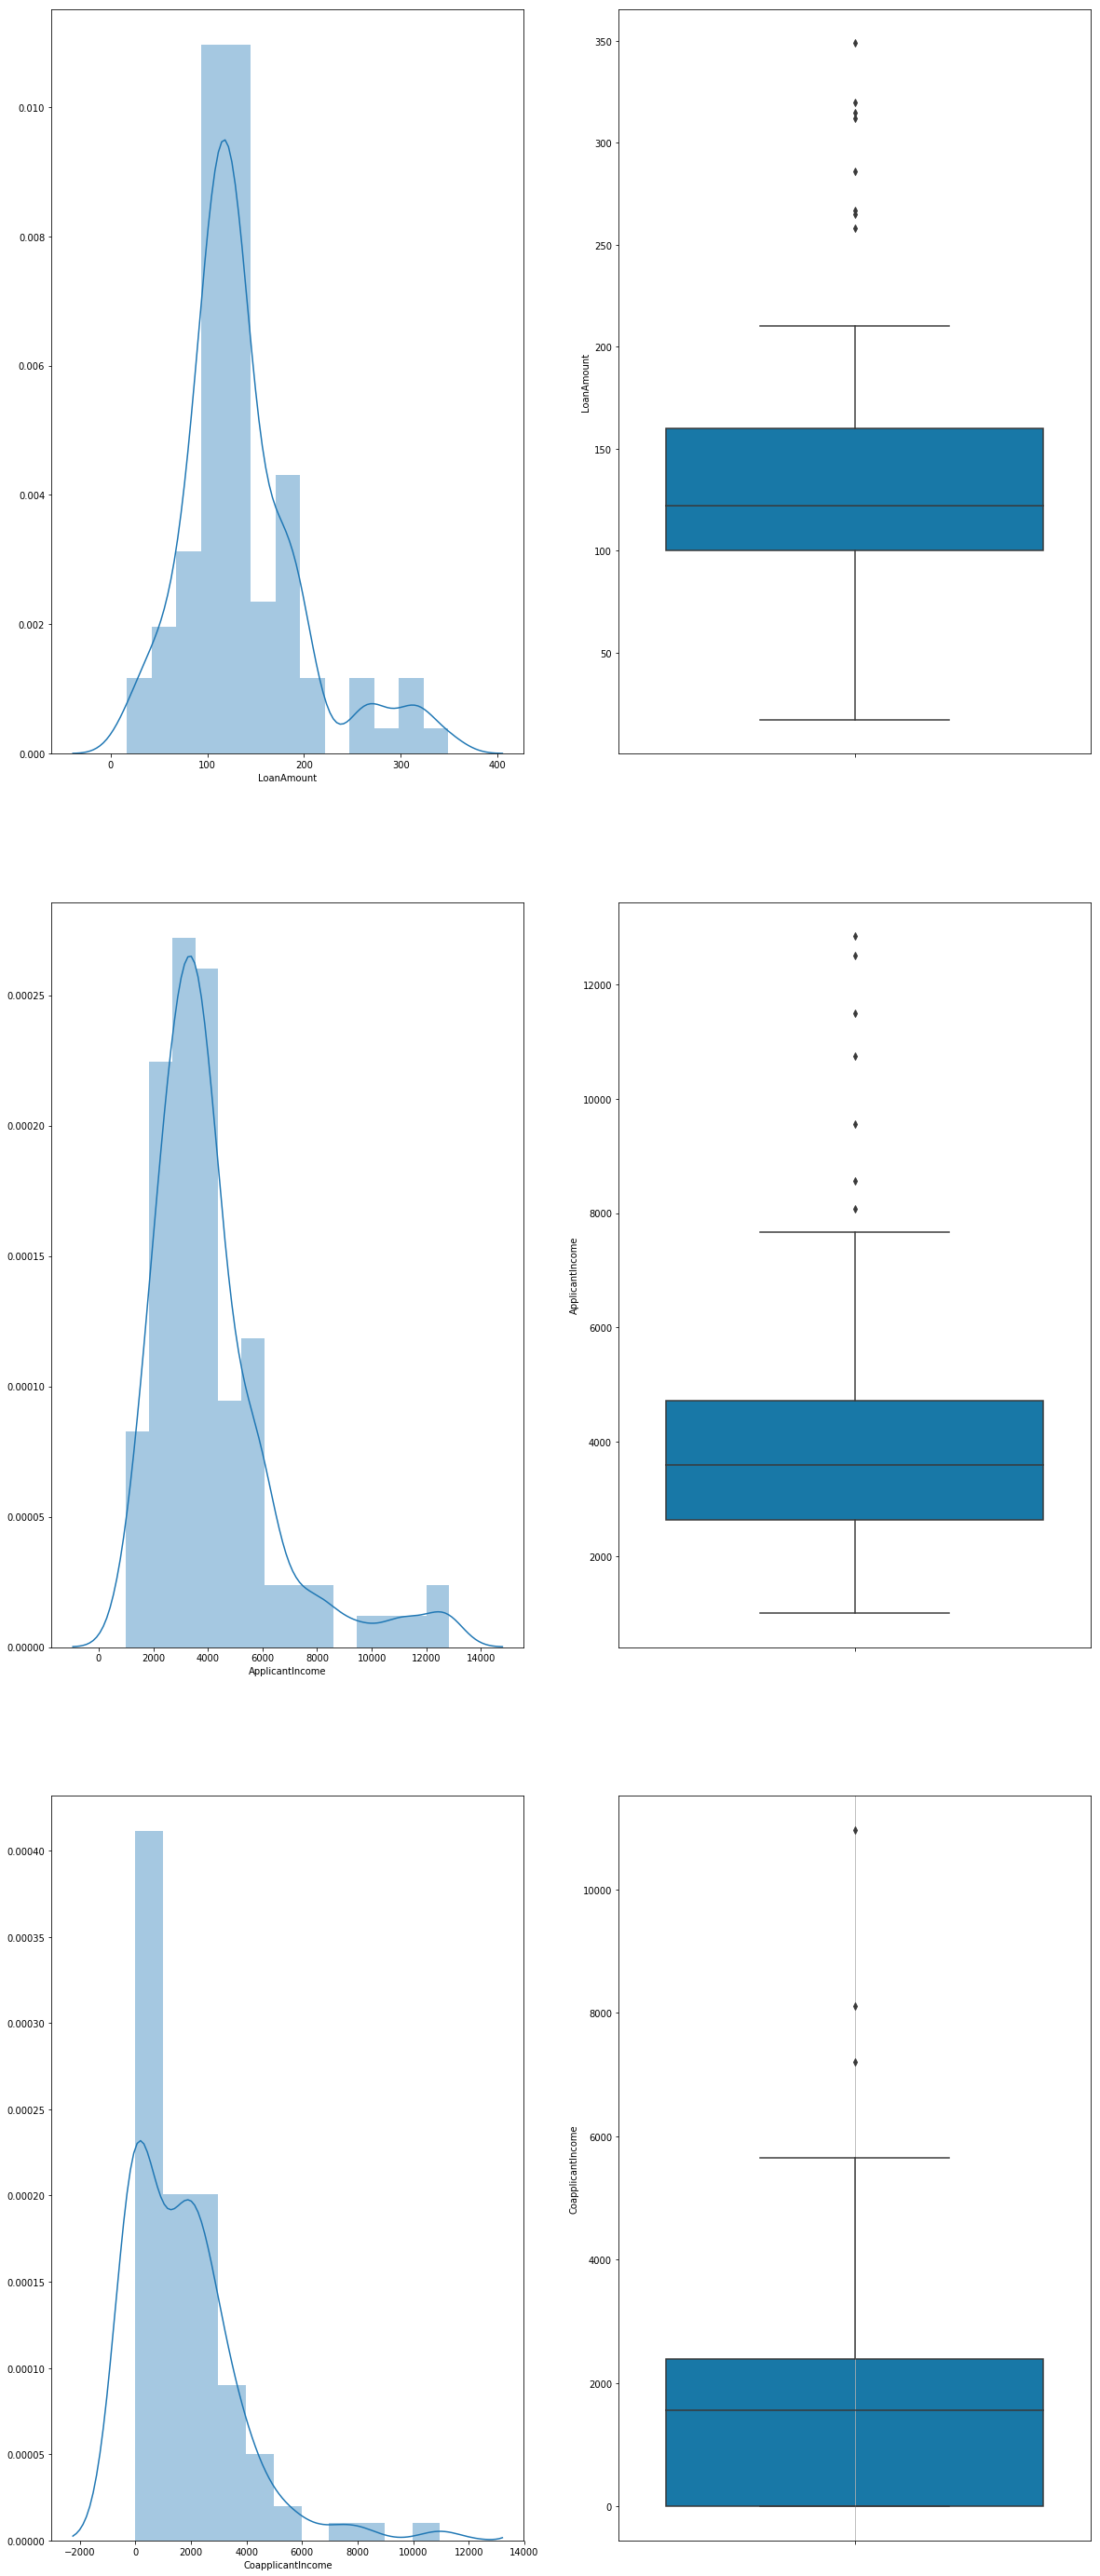

In [9]:
# plotting distribution plot and boxplot for 

f, axes = plt.subplots(3, 2, figsize=(20, 50))

sns.distplot(old["LoanAmount"], ax=axes[0][0])
plt.grid()
sns.boxplot( y="LoanAmount", data=old, palette = "winter", ax = axes[0][1])
plt.grid()

sns.distplot(old["ApplicantIncome"], ax=axes[1][0])
plt.grid()
sns.boxplot( y="ApplicantIncome", data=old, palette = "winter", ax = axes[1][1])
plt.grid()

sns.distplot(old["CoapplicantIncome"], ax=axes[2][0])
plt.grid()
sns.boxplot( y="CoapplicantIncome", data=old, palette = "winter", ax = axes[2][1])
plt.grid()


##### Handling possible outliers using non-parametric statistics method
##### We used Median Absolute Deviation or MAD to handle the outliers

In [10]:
# Median Absolute Deviation(MAD) , based on the median, is a robust non-parametric statistics
# exclude data outside 3 * mad and replace those values with median of the data.

# handling outliers with MAD

# Handling 'ApplicantIncome' column
mad=1.4826*np.median(np.abs(X.ApplicantIncome-X.ApplicantIncome.median()))
size_outlr_mad=X.ApplicantIncome
size_outlr_mad[((X.ApplicantIncome-X.ApplicantIncome.median()).abs()>3*mad)]=X.ApplicantIncome.median()
print("ApplicantIncome MAD :\n",size_outlr_mad.median())

# Handling 'CoapplicantIncome' column
mad=1.4826*np.median(np.abs(X.CoapplicantIncome-X.CoapplicantIncome.median()))
size_outlr_mad=X.CoapplicantIncome
size_outlr_mad[((X.CoapplicantIncome-X.CoapplicantIncome.median()).abs()>3*mad)]=X.CoapplicantIncome.median()
print("CoapplicantIncome MAD :\n",size_outlr_mad.median())

# Handling 'LoanAmount' column
mad=1.4826*np.median(np.abs(X.LoanAmount-X.LoanAmount.median()))
size_outlr_mad=X.LoanAmount
size_outlr_mad[((X.LoanAmount-X.LoanAmount.median()).abs()>3*mad)]=X.LoanAmount.median()
print("LoanAmount MAD :\n",size_outlr_mad.median())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


ApplicantIncome MAD :
 3597.0
CoapplicantIncome MAD :
 1542.25
LoanAmount MAD :
 122.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


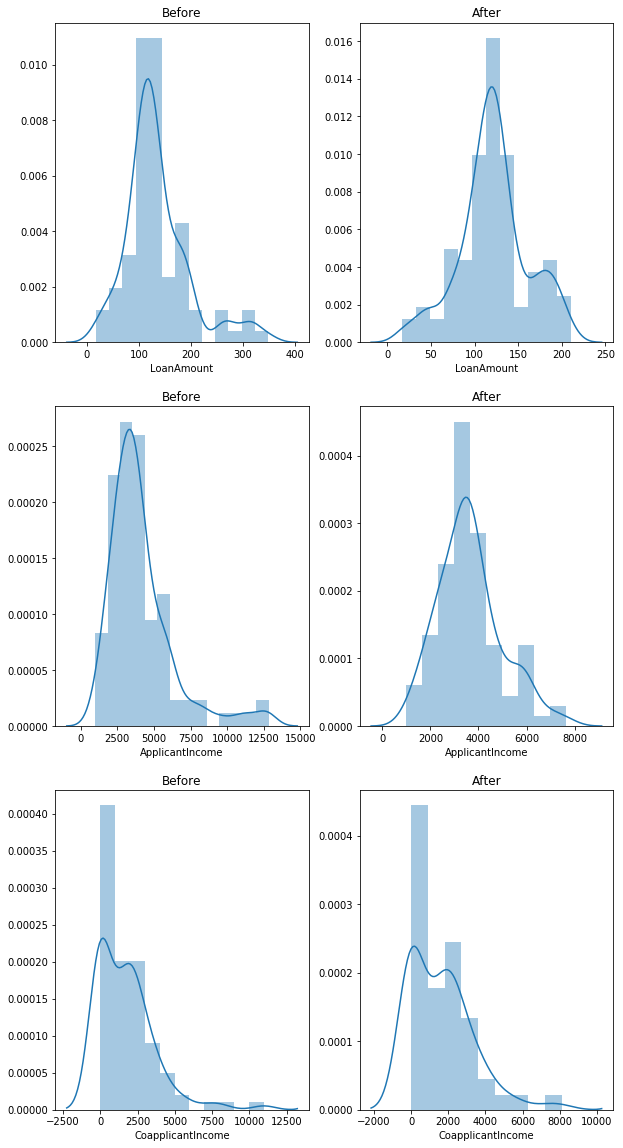

In [11]:
# comparing distribution plots of dataset before and after handling outliers

f, axes = plt.subplots(3, 2, figsize=(10, 20))

sns.distplot(old["LoanAmount"], ax=axes[0][0]).set_title("Before")
plt.grid()
sns.distplot(X["LoanAmount"], ax=axes[0][1]).set_title("After")
plt.grid()

sns.distplot(old["ApplicantIncome"], ax=axes[1][0]).set_title("Before")
plt.grid()
sns.distplot(X["ApplicantIncome"], ax=axes[1][1]).set_title("After")
plt.grid()

sns.distplot(old["CoapplicantIncome"], ax=axes[2][0]).set_title("Before")
plt.grid()
sns.distplot(X["CoapplicantIncome"], ax=axes[2][1]).set_title("After")
plt.grid()
f.savefig('oldnewcompa.png')

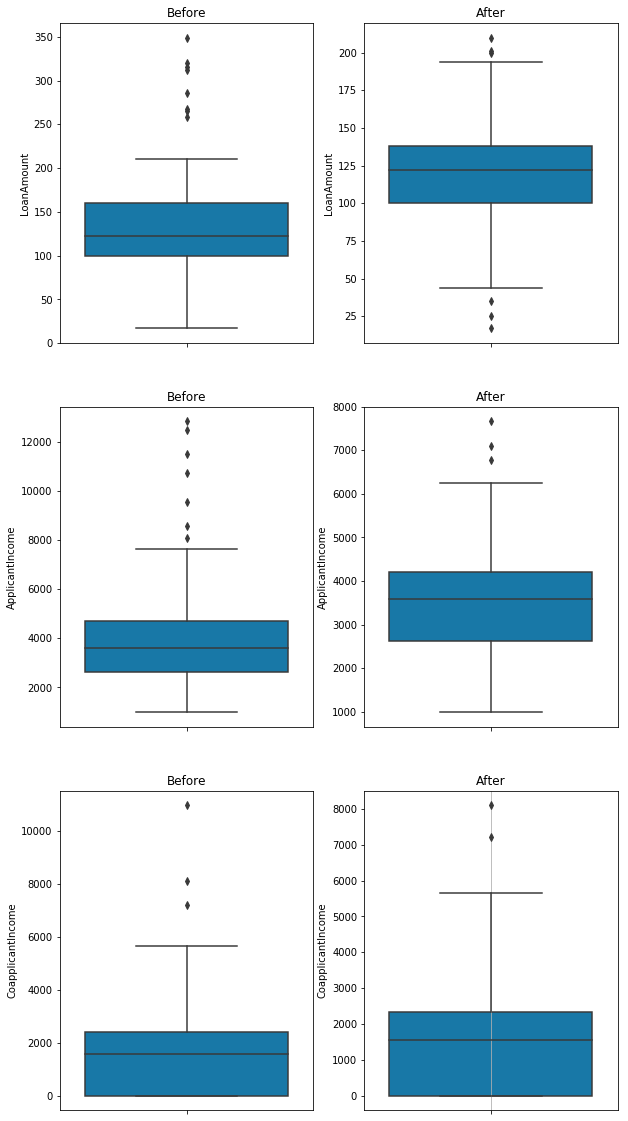

In [12]:
# comparing boxplots plots of dataset before and after handling outliers

f, axes = plt.subplots(3, 2, figsize=(10, 20))

sns.boxplot( y="LoanAmount", data=old, palette = "winter", ax = axes[0][0]).set_title("Before")
plt.grid()
sns.boxplot( y="LoanAmount", data=X, palette = "winter", ax = axes[0][1]).set_title("After")
plt.grid()

sns.boxplot( y="ApplicantIncome", data=old, palette = "winter", ax = axes[1][0]).set_title("Before")
plt.grid()
sns.boxplot( y="ApplicantIncome", data=X, palette = "winter", ax = axes[1][1]).set_title("After")
plt.grid()

sns.boxplot( y="CoapplicantIncome", data=old, palette = "winter", ax = axes[2][0]).set_title("Before")
plt.grid()
sns.boxplot( y="CoapplicantIncome", data=X, palette = "winter", ax = axes[2][1]).set_title("After")
plt.grid()
f.savefig("boxafterbefore.png")

##### Visualising other attributes with respect to our target column i.e. 'Loan_Status'

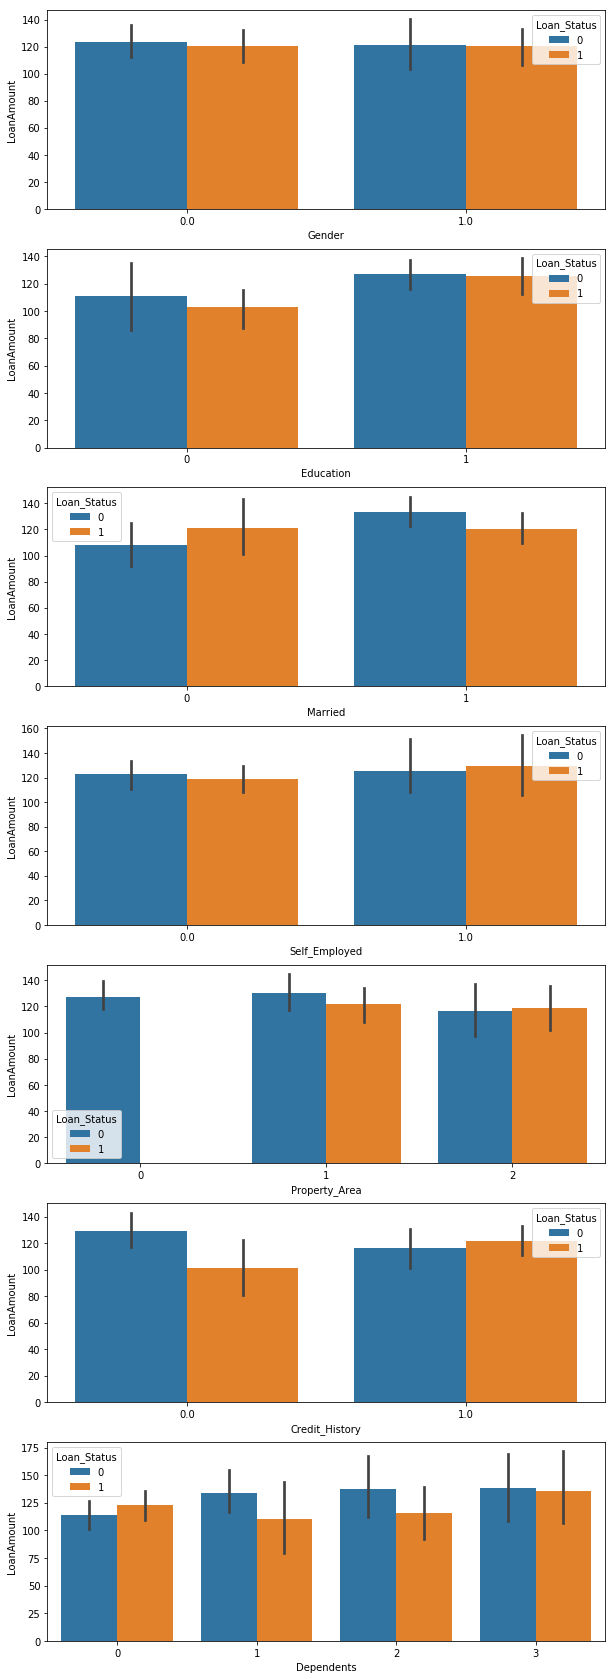

In [13]:
f, axes = plt.subplots(7, 1, figsize=(10, 30)) # preparing the canvas

sns.barplot(x = X.Gender, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[0])

sns.barplot(x = X.Education, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[1])

sns.barplot(x = X.Married, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[2])

sns.barplot(x = X.Self_Employed, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[3])

sns.barplot(x = X.Property_Area, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[4])

sns.barplot(x = X.Credit_History, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[5])

sns.barplot(x = X.Dependents, y = X.LoanAmount, hue = X.Loan_Status, ax = axes[6])

### Random Forest Classifier

##### Training a Random Forest Classifier to determine the principal attributes.

In [14]:
# importing required module
from sklearn.ensemble import RandomForestClassifier

In [15]:
X["is_train"] = np.random.uniform(0,1,len(X)) <= 0.75  # making a new column with random boolean values 
                                                       # indicating which data belongs to train and which
                                                       # which data belongs to test.
train, test = X[X["is_train"]==True], X[X["is_train"]==False]  # splitting train and test dataframe
print("no. of observations for the training dataframes:",len(train))
print("no. of observations for the test dataframes:",len(test))

no. of observations for the training dataframes: 76
no. of observations for the test dataframes: 24


In [16]:
f = X.columns[1:12]  # selecting feature attributes
print(f)
y = train["Loan_Status"] # selecting target attribute

cif = RandomForestClassifier(n_jobs=2, n_estimators=100, random_state=0, verbose=1) # Random Forest Classifier 
                                                                                    # Object
print(cif) # printing details of the Random Forest Classifier Object
cif.fit(train[f], y) # training the model
preds = cif.predict(test[f])  # predicting the target attribute for test dataset
print(preds)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=1, warm_start=False)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


[1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [17]:
# Creating a confusion matrix to view the actual and predicted results
pd.crosstab(test["Loan_Status"], preds, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,7,1
1,4,12


In [18]:
z = test["Loan_Status"]
cif.score(test[f], z) # accuracy of the Random Forest Classifier Model

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7916666666666666

In [19]:
# view a list of the features & their importance scores
list(zip(train[f], cif.feature_importances_))

[('Gender', 0.022998752001938204),
 ('Married', 0.029356323610496546),
 ('Dependents', 0.04632544519905084),
 ('Education', 0.01632747444018825),
 ('Self_Employed', 0.01291837290989398),
 ('ApplicantIncome', 0.1908564421569762),
 ('CoapplicantIncome', 0.10614248164617252),
 ('LoanAmount', 0.1759079613657668),
 ('Loan_Amount_Term', 0.03874584019674761),
 ('Credit_History', 0.21857887517056812),
 ('Property_Area', 0.1418420313022009)]

In [20]:
final_Dataset = X.copy() # making a new copy of the modified dataset
final_Dataset = final_Dataset.drop(["Application_ID", "Education","Gender", "Married", \
                        "Dependents", "Self_Employed", "Loan_Amount_Term", "is_train"],axis=1) # keeping only
                                                                                    # the principal attributes
                                                                                    # and the target attribute
final_Dataset.describe(include="all") # describing the final dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3636.720000,1606.455000,121.520000,0.770000,1.410000,0.640000
std,1325.607679,1707.964583,39.314962,0.422953,0.652811,0.482418
min,1000.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,2636.000000,0.000000,100.000000,1.000000,1.000000,0.000000
50%,3597.000000,1542.250000,122.000000,1.000000,1.500000,1.000000
75%,4197.500000,2341.500000,138.000000,1.000000,2.000000,1.000000
max,7660.000000,8106.000000,210.000000,1.000000,2.000000,1.000000


##### Saving the modified dataset containing only the principal attributes

In [21]:
final_Dataset.to_csv(r'finalTrain.csv', index = None, header = True)

### Training our required models

In [22]:
# importing required modules

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, classification_report

In [23]:
final_Dataset["is_train"] = np.random.uniform(0,1,len(final_Dataset)) <= 0.75
train, test = final_Dataset[final_Dataset["is_train"]==True], final_Dataset[final_Dataset["is_train"]==False]
print("no. of observations for the training dataframes:",len(train))
print("no. of observations for the test dataframes:",len(test))
f = final_Dataset.columns[:-2]
print(f)

no. of observations for the training dataframes: 76
no. of observations for the test dataframes: 24
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')


#### KNN classifier

In [24]:
# importing required modules
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

In [25]:
# First Find the value of K :
            # standardizer = StandardScaler()
            # standardize features
            # X_std = standardizer.fit_transform(final_Dataset[f])
# fit a k-neearest neighbor classifier
# fit a KNN with 5 neighbors
y = final_Dataset["Loan_Status"]
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean",
                           n_jobs=-1).fit(final_Dataset[f], y)
# create search space of possible values of k
# create a pipeline
            # pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
pipe = Pipeline([("knn", knn)])
# create space of candidate values
search_space = [{"knn__n_neighbors":[2,3,4,5,6,7,8,9]}]
# search over possible values of k
# create grid search GridSearchCV impliments a "fit" and "score" method.
# the parameters of the estimator used to apply these methods are 
# optimized by cross-validated grid-search over a parameter grid
clf = GridSearchCV(pipe, search_space, cv = 2, verbose = 1).fit(final_Dataset[f], y)
# view k for best performing model
# best neighborhood size (k)
k = clf.best_estimator_.get_params()["knn__n_neighbors"]
print("k =", k)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


k = 3


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   13.7s finished


In [108]:
# Training the K-NN with K as 3
# convert the data into np.arrays
# the scikit-learn library requires data to be formatted as numpy array.
X = train[f].as_matrix(columns=["ApplicantIncome", "CoapplicantIncome", 
                                "LoanAmount", "Credit_History","Property_Area"])
y = np.array(train["Loan_Status"])
# train the learner
KNNmodel = neighbors.KNeighborsClassifier(k, weights="uniform") # k neighbors with same
                                                          # importance(weightage) to all
KNNmodel.fit(X, y)
# MODEL has been trained
preds = KNNmodel.predict(test[f])
acc_knn = KNNmodel.score(test[f], test["Loan_Status"])
print(acc_knn)

0.5833333333333334


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [109]:
# Create confusion matrix
pd.crosstab(test["Loan_Status"], preds, rownames=["Actual Loan_Status"], 
            colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,1,8
1,2,13


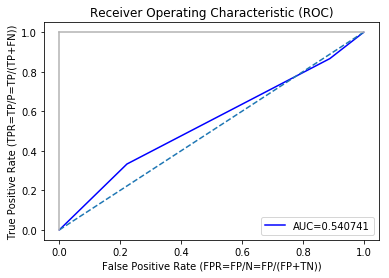

In [119]:
# ROC graph for K-NN
y_score = KNNmodel.predict_proba(test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c="0.7")
plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
#plt.show()
plt.savefig('roc_knn.png')


In [106]:
# Cross-Validate Model Using Recall
print(cross_val_score(KNNmodel, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))
# Cross-validate model using precision
print(cross_val_score(KNNmodel, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="precision"))

[0.76923077 0.84615385 0.76923077 0.53846154 0.83333333]
[0.625      0.64705882 0.66666667 0.58333333 0.58823529]


In [107]:
print("Accuracy of k-NN classifier: ", acc_knn)
print(classification_report(test["Loan_Status"],preds))

Accuracy of k-NN classifier:  0.5833333333333334
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.62      0.87      0.72        15

   micro avg       0.58      0.58      0.58        24
   macro avg       0.48      0.49      0.44        24
weighted avg       0.51      0.58      0.51        24



#### Naive Bayes

In [31]:
# importing required modules
from sklearn.naive_bayes import GaussianNB

In [120]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(train[f],train["Loan_Status"])
predict = Naive_Bayes.predict(test[f])
acc_gnb = accuracy_score(test["Loan_Status"], predict)
print(acc_gnb)
print(Naive_Bayes)

0.9166666666666666
GaussianNB(priors=None, var_smoothing=1e-09)


In [121]:
# Create confusion matrix
pd.crosstab(test["Loan_Status"], predict, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,7,2
1,0,15


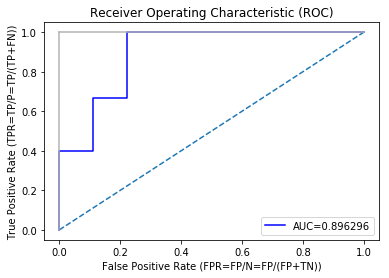

In [124]:
# ROC graph for Naive Bayes
y_score = Naive_Bayes.predict_proba(test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
#plt.show()
plt.savefig('roc_gnb.png')

In [99]:
# Cross-Validate Model Using Recall
print(cross_val_score(Naive_Bayes, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))
# Cross-validate model using precision
print(cross_val_score(Naive_Bayes, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="precision"))

[0.92307692 0.92307692 1.         0.84615385 1.        ]
[0.92307692 0.85714286 0.8125     0.91666667 0.75      ]


In [125]:
# Classificaton Report for our trained Naive Bayes classifier model
print("Accuracy: ", Naive_Bayes.score(test[f], test["Loan_Status"]))
print(classification_report(test["Loan_Status"],predict))

Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.88      1.00      0.94        15

   micro avg       0.92      0.92      0.92        24
   macro avg       0.94      0.89      0.91        24
weighted avg       0.93      0.92      0.91        24



#### Decision Tree

In [37]:
# importing required modules

from sklearn.tree import DecisionTreeClassifier

In [126]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(train[f],train["Loan_Status"])
prediction = Decision_Tree.predict(test[f])
acc_dtree = accuracy_score(test["Loan_Status"], prediction)
print(acc_dtree)
Decision_Tree

0.7916666666666666


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
# to draw the Decision Tree

from sklearn import tree
with open("FinalDTree.txt", "w") as a:
    a = tree.export_graphviz(Decision_Tree, out_file=a)

In [128]:
# Create confusion matrix
pd.crosstab(test["Loan_Status"], prediction, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,6,3
1,2,13


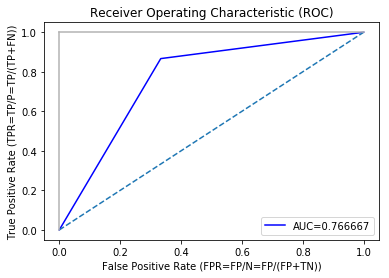

In [129]:
# ROC graph for Decision Tree
y_score = Decision_Tree.predict_proba(test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
#plt.show()
plt.savefig('roc_dtree.png')

In [82]:
# Cross-Validate Model Using Recall
print(cross_val_score(Decision_Tree, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))
# Cross-validate model using precision
print(cross_val_score(Decision_Tree, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="precision"))

[0.53846154 0.46153846 0.92307692 0.69230769 1.        ]
[0.77777778 0.75       0.75       0.81818182 0.71428571]


In [130]:
# Classificaton Report for our trained Decision Tree classifier model
print("Accuracy: ", Decision_Tree.score(test[f], test["Loan_Status"]))
print(classification_report(test["Loan_Status"],prediction))

Accuracy:  0.7916666666666666
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.81      0.87      0.84        15

   micro avg       0.79      0.79      0.79        24
   macro avg       0.78      0.77      0.77        24
weighted avg       0.79      0.79      0.79        24



#### Logistic Regression Model

In [44]:
# importing required modules

from sklearn.linear_model import LogisticRegression

In [131]:
LogisticRegressionModel = LogisticRegression(solver='lbfgs')
LogisticRegressionModel.fit(train[f],train["Loan_Status"])
print("The intercept for the model is:",LogisticRegressionModel.intercept_)
print("The coefficients for the model is:",LogisticRegressionModel.coef_)
predictions = LogisticRegressionModel.predict(test[f])
acc_lr = accuracy_score(test["Loan_Status"], predictions)
print(acc_lr)
LogisticRegressionModel

The intercept for the model is: [-0.62505495]
The coefficients for the model is: [[-1.90032183e-04 -6.94385392e-05 -1.41847856e-03  1.50926139e+00
   7.27142583e-01]]
0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
# Create confusion matrix
pd.crosstab(test["Loan_Status"], predictions, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,6,3
1,1,14


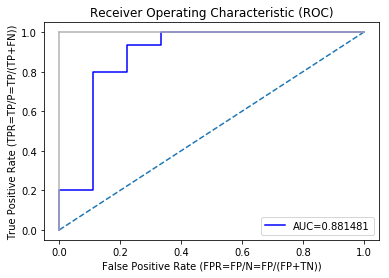

In [133]:
# ROC graph for Logistic Regression
y_score = LogisticRegressionModel.predict_proba(test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
#plt.show()
plt.savefig('roc_lr.png')

In [134]:
# Cross-Validate Model Using Recall
print(cross_val_score(LogisticRegressionModel, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))
# Cross-validate model using precision
print(cross_val_score(LogisticRegressionModel, final_Dataset[f], final_Dataset["Loan_Status"], cv=5, scoring="precision"))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0.92307692 0.92307692 1.         0.84615385 1.        ]
[0.75       0.75       0.8125     0.91666667 0.75      ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [135]:
# RMSE for Logistic Regression
lin_mse = mean_squared_error(predictions, test["Loan_Status"])
lin_rmse = np.sqrt(lin_mse)
print('Logistic Regression RMSE: %.4f' % lin_rmse)

Logistic Regression RMSE: 0.4082


In [136]:
# R-squared for Logistic Regression
print ("Prediction : ",predictions)
print('Logistic Regression R squared: %.4f' % LogisticRegressionModel.score(test[f], test["Loan_Status"]))

Prediction :  [1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1]
Logistic Regression R squared: 0.8333


In [137]:
# Classificaton Report for our trained Logistic Regression classifier model
print("Accuracy: ", LogisticRegressionModel.score(test[f], test["Loan_Status"]))
print(classification_report(test["Loan_Status"],predictions))

Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.82      0.93      0.87        15

   micro avg       0.83      0.83      0.83        24
   macro avg       0.84      0.80      0.81        24
weighted avg       0.84      0.83      0.83        24



In [138]:
# printing the accuracy scores of all the 4 models:
print("KNN:", acc_knn)
print("GNB:", acc_gnb)
print("LR:", acc_lr)
print("DTree:", acc_dtree)

KNN: 0.5833333333333334
GNB: 0.9166666666666666
LR: 0.8333333333333334
DTree: 0.7916666666666666


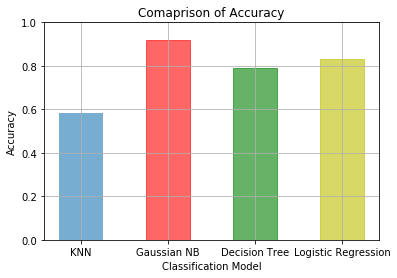

In [140]:
# comapring accuracies of 4 models using barplot
modelss = ["KNN", "Gaussian NB", "Decision Tree", "Logistic Regression"]
accuracies = [acc_knn, acc_gnb, acc_dtree, acc_lr]
barlist = plt.bar(modelss, accuracies, width=0.5, alpha=0.6)
plt.ylim(0, 1.0)
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('y')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Comaprison of Accuracy')
plt.grid()
#plt.show()
plt.savefig('accu_models.png')

## Test Dataset:

In [54]:
# laoding the test dataset
Data = pd.read_csv("test.csv")
# making a copy of the main Data to manipulate
X = Data.copy()
# viewing the numeric dataset
Data.describe(include="all")

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,514.000000,502,511,499,514,488,514.000000,514.000000,497.000000,505.000000,472.000000,514
unique,NaN,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,NaN,M,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,NaN,405,329,285,403,419,NaN,NaN,NaN,NaN,NaN,192
mean,2163.075875,NaN,NaN,NaN,NaN,NaN,5652.608949,1605.816965,148.742455,342.059406,0.843220,NaN
std,467.056621,NaN,NaN,NaN,NaN,NaN,6574.855143,3081.978215,89.057125,65.870517,0.363979,NaN
min,1345.000000,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN
25%,1760.250000,NaN,NaN,NaN,NaN,NaN,2894.250000,0.000000,100.000000,360.000000,1.000000,NaN
50%,2150.000000,NaN,NaN,NaN,NaN,NaN,3862.000000,1031.000000,128.000000,360.000000,1.000000,NaN
75%,2543.750000,NaN,NaN,NaN,NaN,NaN,6000.000000,2229.750000,170.000000,360.000000,1.000000,NaN


In [55]:
# dropping the values which are not the principal attributes
for i in X.columns:
    if i not in f:
        X = X.drop([i], axis=1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,4288,3263.0,133.0,1.0,Urban
1,4843,3806.0,151.0,1.0,Semiurban
2,13650,0.0,NaN,1.0,Urban
3,4652,3583.0,NaN,1.0,Semiurban
4,3816,754.0,160.0,1.0,Urban
5,3052,1030.0,100.0,1.0,Urban
6,11417,1126.0,225.0,1.0,Urban
7,7333,0.0,120.0,1.0,Rural
8,3800,3600.0,216.0,0.0,Urban
9,2071,754.0,94.0,1.0,Semiurban


In [56]:
X.describe(include="all")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
count,514.000000,514.000000,497.000000,472.000000,514
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Semiurban
freq,NaN,NaN,NaN,NaN,192
mean,5652.608949,1605.816965,148.742455,0.843220,NaN
std,6574.855143,3081.978215,89.057125,0.363979,NaN
min,150.000000,0.000000,9.000000,0.000000,NaN
25%,2894.250000,0.000000,100.000000,1.000000,NaN
50%,3862.000000,1031.000000,128.000000,1.000000,NaN
75%,6000.000000,2229.750000,170.000000,1.000000,NaN


In [57]:
# making the non numeric values numeric
X.Property_Area.replace(['Rural','Semiurban', 'Urban'], [0, 1, 2], inplace=True)
X.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area          int64
dtype: object

In [58]:
# filling na values in credit history with 0 (as stated in the ppt)
X.Credit_History.fillna(0, inplace=True)
# filling NaN values with mean +- std in float type columns
avg = X.LoanAmount.mean()
std = X.LoanAmount.std()
count = X.LoanAmount.isnull().sum()
random = np.random.randint(avg-std,avg+std,size=count)
X['LoanAmount'][np.isnan(X['LoanAmount'])]=random
X.describe(include="all")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
count,514.000000,514.000000,514.00000,514.000000,514.000000
mean,5652.608949,1605.816965,148.66537,0.774319,0.964981
std,6574.855143,3081.978215,87.94022,0.418437,0.791487
min,150.000000,0.000000,9.00000,0.000000,0.000000
25%,2894.250000,0.000000,100.00000,1.000000,0.000000
50%,3862.000000,1031.000000,128.00000,1.000000,1.000000
75%,6000.000000,2229.750000,171.50000,1.000000,2.000000
max,81000.000000,41667.000000,700.00000,1.000000,2.000000


In [59]:
# handling outliers with MAD

mad=1.4826*np.median(np.abs(X.ApplicantIncome-X.ApplicantIncome.median()))
size_outlr_mad=X.ApplicantIncome
size_outlr_mad[((X.ApplicantIncome-X.ApplicantIncome.median()).abs()>3*mad)]=X.ApplicantIncome.median()
print("ApplicantIncome MAD :\n",size_outlr_mad.median())

mad=1.4826*np.median(np.abs(X.CoapplicantIncome-X.CoapplicantIncome.median()))
size_outlr_mad=X.CoapplicantIncome
size_outlr_mad[((X.CoapplicantIncome-X.CoapplicantIncome.median()).abs()>3*mad)]=X.CoapplicantIncome.median()
print("CoapplicantIncome MAD :\n",size_outlr_mad.median())

mad=1.4826*np.median(np.abs(X.LoanAmount-X.LoanAmount.median()))
size_outlr_mad=X.LoanAmount
size_outlr_mad[((X.LoanAmount-X.LoanAmount.median()).abs()>3*mad)]=X.LoanAmount.median()
print("LoanAmount MAD :\n",size_outlr_mad.median())
X.describe(include="all")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


ApplicantIncome MAD :
 3860.5
CoapplicantIncome MAD :
 1030.5
LoanAmount MAD :
 128.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,4067.149805,1209.268327,130.367704,0.774319,0.964981
std,1743.417951,1379.440909,46.348698,0.418437,0.791487
min,150.000000,0.000000,9.000000,0.000000,0.000000
25%,2894.250000,0.000000,100.000000,1.000000,0.000000
50%,3860.500000,1030.500000,128.000000,1.000000,1.000000
75%,4836.500000,2082.000000,157.750000,1.000000,2.000000
max,9538.000000,5500.000000,260.000000,1.000000,2.000000


### Logistic Regression

In [60]:
LogisticRegressionModel.fit(final_Dataset[f],final_Dataset["Loan_Status"])
predictions = LogisticRegressionModel.predict(X[f])
#print("1:", predictions.count('1'), "\n0:", predictions.count('0'))
len(predictions)

514

### Naive Bayes 

In [61]:
Naive_Bayes.fit(final_Dataset[f],final_Dataset["Loan_Status"])
predict = Naive_Bayes.predict(X[f])
len(predict)

514

### KNN

In [62]:
KNNmodel.fit(final_Dataset[f],final_Dataset["Loan_Status"])
preds = KNNmodel.predict(X[f])
len(preds)

514

### Decision Tree

In [63]:
Decision_Tree.fit(final_Dataset[f],final_Dataset["Loan_Status"])
prediction = Decision_Tree.predict(X[f])
len(prediction)

514

In [64]:
print(sum(1 for i,j,k,l in zip(predict,prediction,predictions, preds) if i==j==k==l))

213


In [67]:
unique, counts = np.unique(predictions, return_counts = True)
dict(zip(unique, counts))

{0: 165, 1: 349}

In [68]:
unique, counts = np.unique(predict, return_counts = True)
dict(zip(unique, counts))

{0: 247, 1: 267}

In [69]:
unique, counts = np.unique(prediction, return_counts = True)
dict(zip(unique, counts))

{0: 259, 1: 255}

In [70]:
unique, counts = np.unique(preds, return_counts = True)
dict(zip(unique, counts))

{0: 142, 1: 372}